## Learning goals

You will be able to:
* Describe the need for logistic regression
* Describe the mathematics behind logistic regression
* Interpret the parameters of a logistic regression model

# Linear to Logistic regression
![img](img/linear_vs_logistic_regression.jpg)

## What do we know about linear regression?

- What are the requirements for the variables types?
- What assumptions do we have?
- How do we interpret the coefficients?
- What metrics do we use to evaluate our model?

And how will logistic regression be different?

### Scenarios 

#### Scenario 1: Predict income together
In this example, we want to find a relationship between age and monthly income. It is definitely reasonable to assume that, on average, older people have a higher income than younger people who are newer to the job market and have less experience. A potential relationship could look like the plot below. The monthly income is shown in 1000 USD.

#### Scenario 2: Predict likelihood of diabetes
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. [reference here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [24]:
# create data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

age = np.random.uniform(18, 65, 100)
income = np.random.normal((age/10), 0.5)
age = age.reshape(-1,1)

Plot it!

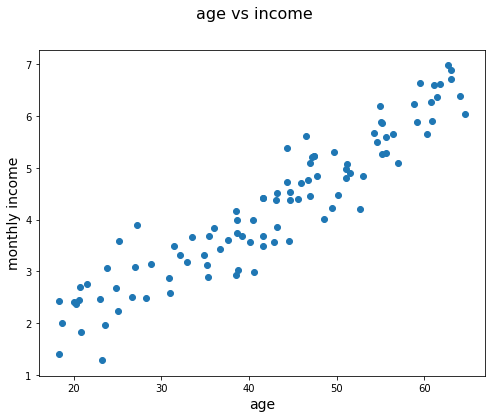

In [25]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('age vs income', fontsize=16)
plt.scatter(age, income)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

In linear regression, you would try to find a relationship between age and monthly income. Conceptually, this means fitting a line that represents the relationship between age and monthly income, as shown below.

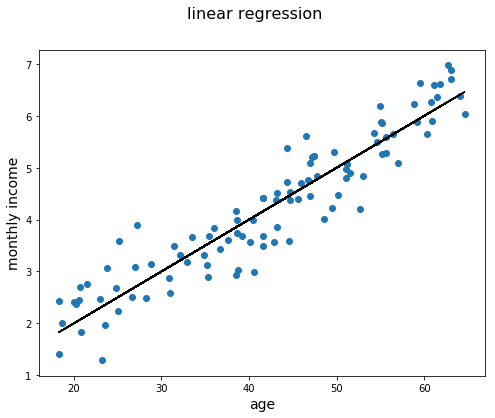

In [3]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income)
plt.plot(age, age/10, c = "black")
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

The idea is that you could use this line to make predictions in the future. In this case, the relationship is modeled as follows: the expected monthly income for someone who is, say, 40 years old, is 3000 (3 on the y-axis). Of course, the actual income will most likely be different, but this gives an indication of what the model predicts as the salary value.

## So how is this related to logistic regression?

Now, imagine you get a data set where no information on exact income is given (after all, people don't like to talk about how much they earn!), but you only have information on whether or not they earn more than 4000 USD per month. Starting from the generated data we used before, the new variable `income_bin` was transformed to 1 when someone's income is over 4000 USD, and 0 when the income is less than 4000 USD.

In [26]:
income_bin = income > 4
income_bin =income_bin.astype(int)  
print(income_bin)

[0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1]


Let's have a look at what happens when we plot this.

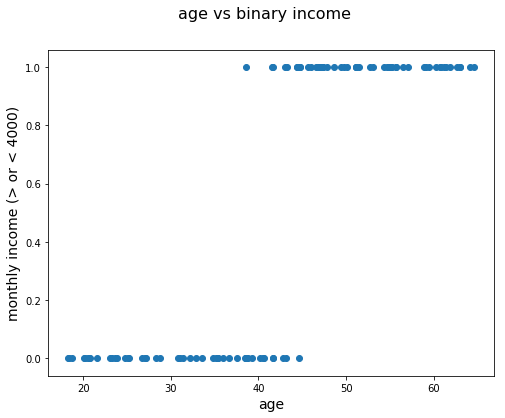

In [27]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('age vs binary income', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income (> or < 4000)", fontsize=14)
plt.show()

You can already tell that fitting a straight line will not be exactly desired here, but let's still have a look at what happens when you fit a regression line to these data. 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# create linear regression object
lin_reg = LinearRegression()
lin_reg.fit(age, income_bin)
# store the coefficients
coef = lin_reg.coef_
interc = lin_reg.intercept_
# create the line
lin_income = (interc + age * coef)

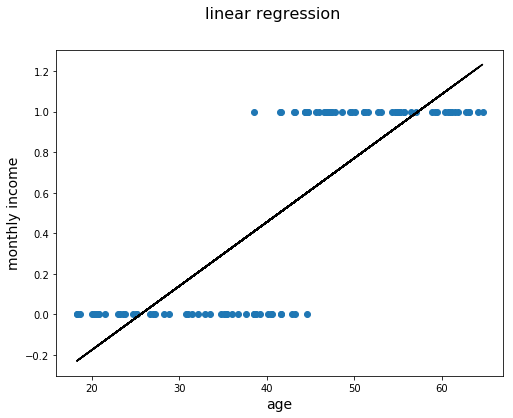

In [7]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.plot(age, lin_income, c = "black")
plt.show()

You can see that this doesn't make a lot of sense. This straight line cannot grasp the true structure of what is going on when using a linear regression model. Now, without going into the mathematical details for now, let's look at a logistic regression model and fit that to the dataset.

In [28]:
# Create logistic regression object
regr = LogisticRegression(C=1e5)
# Train the model using the training sets
regr.fit(age, income_bin)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [29]:
# store the coefficients
coef = regr.coef_
interc = regr.intercept_
# create the linear predictor
lin_pred= (age * coef + interc)
# perform the log transformation
mod_income = 1 / (1 + np.exp(-lin_pred))
#sort the numbers to make sure plot looks right
age_ordered, mod_income_ordered = zip(*sorted(zip(age ,mod_income.ravel()),key=lambda x: x[0]))

### Look at dataset predictions

It is the **probability** of being in the target class

In [30]:
np.set_printoptions(suppress=True)
print(mod_income[:6])

[[0.0000196492]
 [0.9715069861]
 [0.0676919277]
 [0.9998736124]
 [0.9998487514]
 [0.0002937636]]


### Plot it!

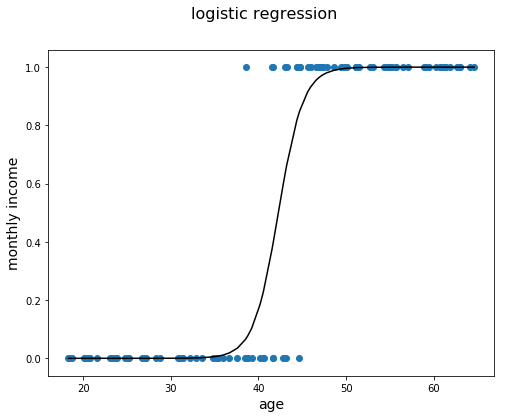

In [31]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('logistic regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.plot(age_ordered, mod_income_ordered, c = "black")
plt.show()

#### Review the new shape

This already looks a lot better! You can see that this function has an S-shape which plateaus to 0 in the left tale and 1 to the right tale. This is exactly what we needed here. Hopefully this example was a good way of showing why logistic regression is useful. Now, it's time to dive into the mathematics that make logistic regression possible.

That **S-shape** is what's known as a **sigmoid function**

![sigmoid](img/SigmoidFunction_701.gif)

## Logistic regression model formulation

### The model

As you might remember from the linear regression lesson, a linear regression model can be written as:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2, x_2 +\ldots + \beta_n x_n $$

When there are $n$ predictors $x_1,\ldots,x_n$ and $n+1$ parameter estimates that are estimated by the model $\hat\beta_0, \hat\beta_1,\ldots, \hat\beta_n$. $ \hat y $ is an estimator for the outcome variable.

Translating this model formulation to our example, this boils down to:

$$ \text{income} = \beta_0 + \beta_1 \text{age} $$

When you want to apply this to a binary dataset, what you actually want to do is perform a **classification** of your data in one group versus another one. In our case, we want to classify our observations (the 100 people in our data set) as good as possible in "earns more than 4k" and "earns less than 4k". A model will have to make a guess of what the **probability** is of belonging to one group versus another. And that is exactly what logistic regression models can do! 

### Transformation

Essentially, what happens is, the linear regression is *transformed* in a way that the outcome takes a value between 0 and 1. This can then be interpreted as a probability (e.g., 0.2 is a probability of 20%). Applied to our example, the expression for a logistic regression model would look like this:

$$ P(\text{income} > 4000) = \displaystyle \frac{1}{1+e^{-(\hat \beta_0+\hat \beta_1 \text{age})}}$$

Note that the outcome is written as $P(\text{income} > 4000)$. This means that the output should be interpreted as *the probability that the monthly income is over 4000 USD*.

It is important to note that this is the case because the income variable was relabeled to be equal to 1 when the income is bigger than 4000, and 0 when smaller than 4000. In other words, The outcome variable should be interpreted as *the* **probability** *of the class label to be equal to 1*.

### Interpretation - with a side of more math
#### What are the odds?

As mentioned before, the probability of an income over 4000 can be calculated using:

$$ P(\text{income} > 4000) = \displaystyle \frac{1}{1+e^{-(\hat \beta_o+\hat \beta_1 \text{age})}}$$

You can show that, by multiplying both numerator and denominator by $e^{(\hat \beta_0+\hat \beta_1 \text{age})}$


$$ P(\text{income} > 4000) = \displaystyle \frac{e^{\hat \beta_0+\hat \beta_1 \text{age}}}{1+e^{\hat \beta_o+\hat \beta_1 \text{age}}}$$

As a result, you can compute $P(\text{income} \leq 4000)$ as:

$$ P(\text{income} < 4000) = 1- \displaystyle \frac{e^{\hat \beta_0+\hat \beta_1 \text{age}}}{1+e^{\hat \beta_o+\hat \beta_1 \text{age}}}= \displaystyle \frac{1}{1+e^{\hat \beta_0+\hat \beta_1 \text{age}}}$$



#### Odds ratio

This doesn't seem to be very spectacular, but combining these two results leads to an easy interpretation of the model parameters, triggered by the *odds*

$$ \dfrac{P(\text{income} > 4000)}{P(\text{income} < 4000)} = e^{\hat \beta_0+\hat \beta_1 \text{age}} $$

This expression can be interpreted as the *odds in favor of an income greater than 4000 USD*.

#### Interpretting coefficients

This result, in combination with mathematical properties of exponential functions, leads to the fact that, applied to our example:

if *age* goes up by 1, the odds are multiplied by $e^{\beta_1}$

In our example, there is a positive relationship between age and income, this will lead a positive $\beta_1 > 0$, so $e^{\beta_1}>1$, and the odds will increase as *age* increases.

### Assumptions

- Binary logistic regression requires the dependent variable to be binary.
- For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
- Only the meaningful variables should be included.
- The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
- The independent variables are linearly related to the log odds.
- Logistic regression requires quite large sample sizes.

# A real data example

In [3]:
import statsmodels as sm
import pandas as pd
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [4]:
salaries = pd.read_csv("salaries_final.csv", index_col = 0)
salaries.head()

,Age,Education,Occupation,Relationship,Race,Sex,Target
0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


In [6]:
!pip install patsy

In [7]:
from patsy import dmatrices
y, X = dmatrices('Target ~ Age  + C(Race) + C(Sex)',
                  salaries, return_type = "dataframe")

AssertionError: 

#### Statsmodels method
[statsmodels logit documentation](https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html)

In [13]:
import statsmodels.api as sm
logit_model = sm.Logit(y.iloc[:,1], X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.498651
         Iterations 6


In [ ]:
# statsmodels has a nice summary function - remember this
result.summary()

In [15]:
np.exp(result.params)

Intercept                        0.011977
C(Race)[T.Asian-Pac-Islander]    2.715861
C(Race)[T.Black]                 1.198638
C(Race)[T.Other]                 0.891987
C(Race)[T.White]                 2.396965
C(Sex)[T.Male]                   3.343142
Age                              1.039480
dtype: float64

Once you **get** a model with `Logit` you can use `LogitResults` to evaluate it's performance more in depth. 
[documentation](http://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.LogitResults.html)

#### Scikit learn has a `LogisticRegression` algorithm

Default cutoff is **0.5**

You can also use scikit learn to retrieve the parameter estimates. The disadvantage here though is that there are no p-values for your parameter estimates!

In [16]:
logreg = LogisticRegression(fit_intercept = False, C = 1e15)
model_log = logreg.fit(X, y.iloc[:,1])
model_log

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [17]:
model_log.coef_

array([[-4.38706343,  0.96178902,  0.14397983, -0.14384057,  0.83689457,
         1.2067121 ,  0.03871011]])

#### But the sklearn `logistic` option isn't useless

Let's take a moment to look at the `sklean` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to tie some concepts from preivious lectures together. 

![logo3](img/1280px-Scikit_learn_logo.png)

### Diabetes Scenario


Let's work through it together!

In [12]:
diabetes = pd.read_csv('diabetes.csv')

In [13]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [16]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()

In [24]:
X = diabetes.iloc[:,:-1]

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [26]:
Y = diabetes.Outcome

In [28]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [29]:
X_scaled = scaler.fit_transform(X)

In [31]:
type(X_scaled)

numpy.ndarray

In [35]:
import statsmodels.api as sm
logit_model_d = sm.Logit(Y, X_scaled)
dresult = logit_model_d.fit()

Optimization terminated successfully.
         Current function value: 0.530720
         Iterations 6


In [36]:
dresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 13 Jun 2019   Pseudo R-squ.:                  0.1795
Time:                        15:09:54   Log-Likelihood:                -407.59
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 4.458e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3903      0.106      3.665      0.000       0.182       0.599
x2             1.0879      0.119      9.176      0.000       0.856       1.320
x3            -0.2454      0.099     -2.479      0.013      -0.440      -0.051
x4             0.0225      0.107      0.211      0.833      -0.186       0.231
x5            -0.1622      0.106     -1.530      0.126      -0.370       0.046
x6             0.5903      0.109      5.431      0.000       0.377       0.803
x7             0.3248      0.097      3.362      0.001       0.135       0.514
x8             0.1212      0.107      1.130      0.258      -0.089       0.331
==============================================================================
"""

In [38]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [43]:
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [44]:
x_Df = pd.DataFrame(X_scaled, columns=X.columns)

In [45]:
x_Df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [47]:
logit_model_d = sm.Logit(Y, x_Df)
dresult = logit_model_d.fit()

Optimization terminated successfully.
         Current function value: 0.530720
         Iterations 6


In [48]:
dresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 13 Jun 2019   Pseudo R-squ.:                  0.1795
Time:                        15:16:52   Log-Likelihood:                -407.59
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 4.458e-35
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.3903      0.106      3.665      0.000       0.182       0.599
Glucose                      1.0879      0.119      9.176      0.000       0.856       1.320
BloodPressure               -0.2454      0.099     -2.479      0.013      -0.440      -0.051
SkinThickness                0.0225      0.107      0.211      0.833      -0.186       0.231
Insulin                     -0.1622      0.106     -1.530      0.126      -0.370       0.046
BMI                          0.5903      0.109      5.431      0.000       0.377       0.803
DiabetesPedigreeFunction     0.3248      0.097      3.362      0.001       0.135       0.514
Age                          0.1212      0.107      1.130      0.258      -0.089       0.331
============================================================================================
"""

In [50]:
logreg = LogisticRegression(fit_intercept = False, C = 1e15)
model_log = logreg.fit(x_Df, Y)
model_log

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [55]:
model_log.coef_

array([[ 0.39024907,  1.08791914, -0.24544979,  0.02250608, -0.1621995 ,
         0.59035938,  0.32483104,  0.12120845]])

In [57]:

evall = sm.Logit.LogitResults(dresult)

AttributeError: type object 'Logit' has no attribute 'LogitResults'

In [59]:
from statsmodels import LogitResults

ImportError: cannot import name 'LogitResults' from 'statsmodels' (/Users/apeeblesmadigan/anaconda3/lib/python3.7/site-packages/statsmodels/__init__.py)

In [60]:
dresult.aic()

TypeError: 'numpy.float64' object is not callable